# Classification

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
cancer['target_names']

array(['malignant', 'benign'],
      dtype='<U9')

In [4]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='<U23')

In [5]:
X = cancer['data'][:, 0]
X = X.reshape((X.shape[0], 1))
y = cancer['target']
y = 1 - y.reshape((y.shape[0], 1))

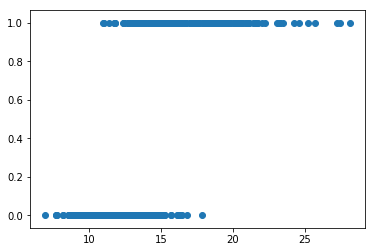

In [6]:
plt.scatter(X, y)

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X, y)

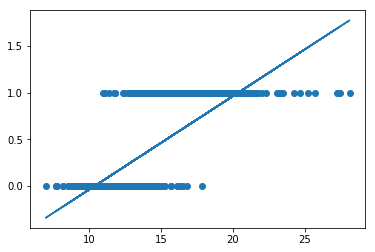

In [8]:
plt.scatter(X, y);
plt.plot(X, model.predict(X));

---
## Logistic Regression

### Hypothesis

$$ h_\theta(x) = g(\theta^Tx) = \frac{1}{1 + e^{-\theta^Tx}} $$

where $ g(z) = \frac{1}{1 + e^{-z}} $ is the sigmoid function:

![sigmoid](images/logistic-regression/sigmoid.png)

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X, y.ravel())

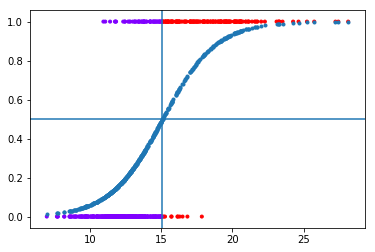

In [10]:
plt.scatter(X, y, c=model.predict(X), cmap=plt.cm.rainbow, marker='.');
plt.scatter(X, model.predict_proba(X)[:, 1], marker='.');
plt.axhline(.5);
plt.axvline(-model.intercept_ / model.coef_);

### Cost Function

$$ J_\theta(X) = -\frac{1}{m}\sum_{i=1}^m y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) $$

### Gradient Descent

$
Repeat \  \{ \\
    \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J_\theta(X) \\
\}$

where:

$ \begin{equation}
   \begin{split}
       \frac{\partial J_\theta(X)}{\partial \theta_j}
       &= \frac{\partial}{\partial \theta_j} \frac{-1}{m}\sum_{i=1}^m y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \\
       &= -\frac{1}{m}\sum_{i=1}^m (\frac{y^{(i)}}{h_\theta(x^{(i)})} - \frac{1 - y^{(i)}}{1 - h_\theta(x^{(i)})}) \frac{\partial}{\partial \theta_j} h_\theta(x^{(i)}) \\
       &= -\frac{1}{m}\sum_{i=1}^m (\frac{y^{(i)}}{g(\theta^Tx)} - \frac{1 - y^{(i)}}{1 - g(\theta^Tx)}) g(\theta^Tx) (1 - g(\theta^Tx)) \frac{\partial}{\partial \theta_j} (\theta^Tx^{(i)}) \\
       &= -\frac{1}{m}\sum_{i=1}^m (y^{(i)} (1 - g(\theta^Tx)) - (1 - y^{(i)}) g(\theta^Tx))x_j^{(i)} \\
       &= \frac{1}{m}\sum_{i=1}^m (h_{w,b}(x^{(i)}) - y^{(i)})x_j^{(i)}
   \end{split}
   \end{equation} $

and:

$ \begin{equation}
   \begin{split}
       g'(z) &= \frac{d}{dz} \frac{1}{1 + e^{-z}} \\
       &= \frac{1}{(1 + e^{-z})^2}(e^{-z}) \\
       &= \frac{1}{1 + e^{-z}}.(1 - \frac{1}{1 + e^{-z}}) \\
       &= g(z)(1 - g(z))
   \end{split}
   \end{equation} $

---
## Multiclass

<img style="float: left;" width="450" src="images/logistic-regression/multinomial.png">

<img style="float: left;" width="450" src="images/logistic-regression/ovr.png">